# Topic Modelによる類似文献の提示について
@date 2019.08.14  


## 参考文献 
[1]"Latent Dirichlet Allocation",  http://papers.nips.cc/paper/2070-latent-dirichlet-allocation.pdf   
[2]"LDAvis: A method for visualizing and interpreting topics", https://www.aclweb.org/anthology/W14-3110　　  

## ライブラリのインポート

In [66]:
import sys 
import time
from datetime import datetime
import pickle
import logging
from collections import Counter
from pprint import pprint

import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
import pandas as pd

# Natural Language Processing Libraries
import gensim
from gensim import similarities     
from gensim.test.utils import get_tmpfile, common_texts
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Vizualization
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

# Local
sys.path.append('../app')
from topic_model import TopicModel
from error_definition import Result

import warnings
warnings.filterwarnings('ignore')

## Topic modelの初期化
csvファイルからデータを読み込む。

In [67]:
# ラッパークラスの初期化
topic_model = TopicModel()

# stopwordsや前処理要データを落としてくる
topic_model.load_nltk_data()

In [94]:
FILE_NAME = "../app/data/test_data.csv"
CHUNK_SIZE = 1000
NUM_MAX_DOCS = 5000
%time topic_model.create_corpus_from_csv(FILE_NAME, chunksize=CHUNK_SIZE, num_docs=NUM_MAX_DOCS)

CPU times: user 1min 26s, sys: 794 ms, total: 1min 27s
Wall time: 1min 29s


## Topic modelの学習
トピック数は学習で決まらないので、予め設定しておく必要がある。トピック数を色々変化させて学習結果の良さを比べることで最適なトピック数を決める事ができる。  

num_passを多くすると学習時間が長くなるが、結果が収束しやすくなると考えられる。

In [95]:
# トピック数を決める
topic_model.set_num_topics(10)

# 学習の開始
topic_model.train(num_pass=10);

<Result.SUCCESS: 6>

## 学習結果の確認

In [96]:
pprint(topic_model.get_model_info())

{'date': datetime.datetime(2019, 8, 28, 0, 4, 45, 630619),
 'num_docs': 5000,
 'num_topics': 10}


結果を可視化する。左半分の円は、各円がトピックを表しておりその半径が文献の数を表す。位置関係はおよそのトピックの距離を表しているため、うまく散らばっているほどよいと言える。（ただし、本来多次元空間での話を無理やし2次元空間にうつしたものであることに注意。）  
右半分は各トピックでの単語の割合を可視化しており、水色が全体の単語数、赤色がそのトピックが占める単語数を表す。

In [97]:
vis = pyLDAvis.gensim.prepare(topic_model.model.lda, topic_model.data.corpuses, topic_model.model.dictionary, sort_topics=False, mds="tsne") # t-sneだときれいにわかれて”見える”
vis

PreparedData(topic_coordinates=            Freq  cluster  topics           x           y
topic                                                    
0       1.194907        1       1  -19.785484  -29.557541
1      11.689352        1       2  193.724274 -101.705070
2       4.200633        1       3 -126.755844   46.480473
3       2.411983        1       4  102.063431  -17.362871
4      12.211617        1       5  201.578568   65.018921
5      22.082689        1       6   47.669666 -151.563690
6      21.114563        1       7 -107.047623 -117.972748
7      14.899175        1       8  -54.847691  174.873077
8       3.645416        1       9  112.122688  179.556000
9       6.549662        1      10   30.792034   82.114693, topic_info=      Category         Freq         Term        Total  loglift  logprob
term                                                                   
12200  Default  4847.000000        model  4847.000000  30.0000  30.0000
2089   Default  3314.000000      problem  3314.000000  29.0000  29.0000
5908   Default  4195.000000      network  4195.000000  28.0000  28.0000
4068   Default  1499.000000        graph  1499.000000  27.0000  27.0000
16627  Default  3055.000000    algorithm  3055.000000  26.0000  26.0000
3607   Default  1941.000000        learn  1941.000000  25.0000  25.0000
18192  Default  1909.000000        image  1909.000000  24.0000  24.0000
14191  Default  3463.000000       method  3463.000000  23.0000  23.0000
6509   Default  2840.000000       system  2840.000000  22.0000  22.0000
2993   Default  3722.000000      propose  3722.000000  21.0000  21.0000
13069  Default  2426.000000         time  2426.000000  20.0000  20.0000
6440   Default  1474.000000         task  1474.000000  19.0000  19.0000
7612   Default  1410.000000      feature  1410.000000  18.0000  18.0000
10419  Default   597.000000         code   597.000000  17.0000  17.0000
14429  Default  3486.000000         data  3486.000000  16.0000  16.0000
11733  Default   863.000000      control   863.000000  15.0000  15.0000
18611  Default  1118.000000       neural  1118.000000  14.0000  14.0000
18094  Default   771.000000      channel   771.000000  13.0000  13.0000
5577   Default  1571.000000         user  1571.000000  12.0000  12.0000
9006   Default   532.000000        agent   532.000000  11.0000  11.0000
3469   Default   688.000000        human   688.000000  10.0000  10.0000
16633  Default  1303.000000         give  1303.000000   9.0000   9.0000
3157   Default  1760.000000  information  1760.000000   8.0000   8.0000
5901   Default   801.000000        power   801.000000   7.0000   7.0000
8329   Default   907.000000        bound   907.000000   6.0000   6.0000
11970  Default   406.000000       device   406.000000   5.0000   5.0000
663    Default  5184.000000          use  5184.000000   4.0000   4.0000
18497  Default   937.000000         deep   937.000000   3.0000   3.0000
5073   Default   821.000000       scheme   821.000000   2.0000   2.0000
7450   Default   470.000000      program   470.000000   1.0000   1.0000
...        ...          ...          ...          ...      ...      ...
17894  Topic10   136.356766     receiver   137.262375   2.7191  -5.4768
1836   Topic10   133.783798        relay   134.689362   2.7190  -5.4959
6005   Topic10   131.642776        radio   132.548340   2.7189  -5.5120
10534  Topic10   126.554741    threshold   127.460747   2.7186  -5.5514
17614  Topic10   126.380424      station   127.285988   2.7186  -5.5528
5760   Topic10   123.225868  consumption   124.131531   2.7184  -5.5781
15209  Topic10   113.591019  transmitter   114.496590   2.7178  -5.6595
3305   Topic10   104.548660       outage   105.454262   2.7171  -5.7425
2711   Topic10   101.200409      contact   102.106178   2.7168  -5.7750
5860   Topic10   100.010483      antenna   100.916061   2.7167  -5.7868
8333   Topic10    99.201172  sensitivity   100.107277   2.7167  -5.7950
8328   Topic10   225.474030      message   238.737076   2.6686  -4.9739
5901   Topic10   651.

 各トピックにどのような単語が含まれているかを可視化する。

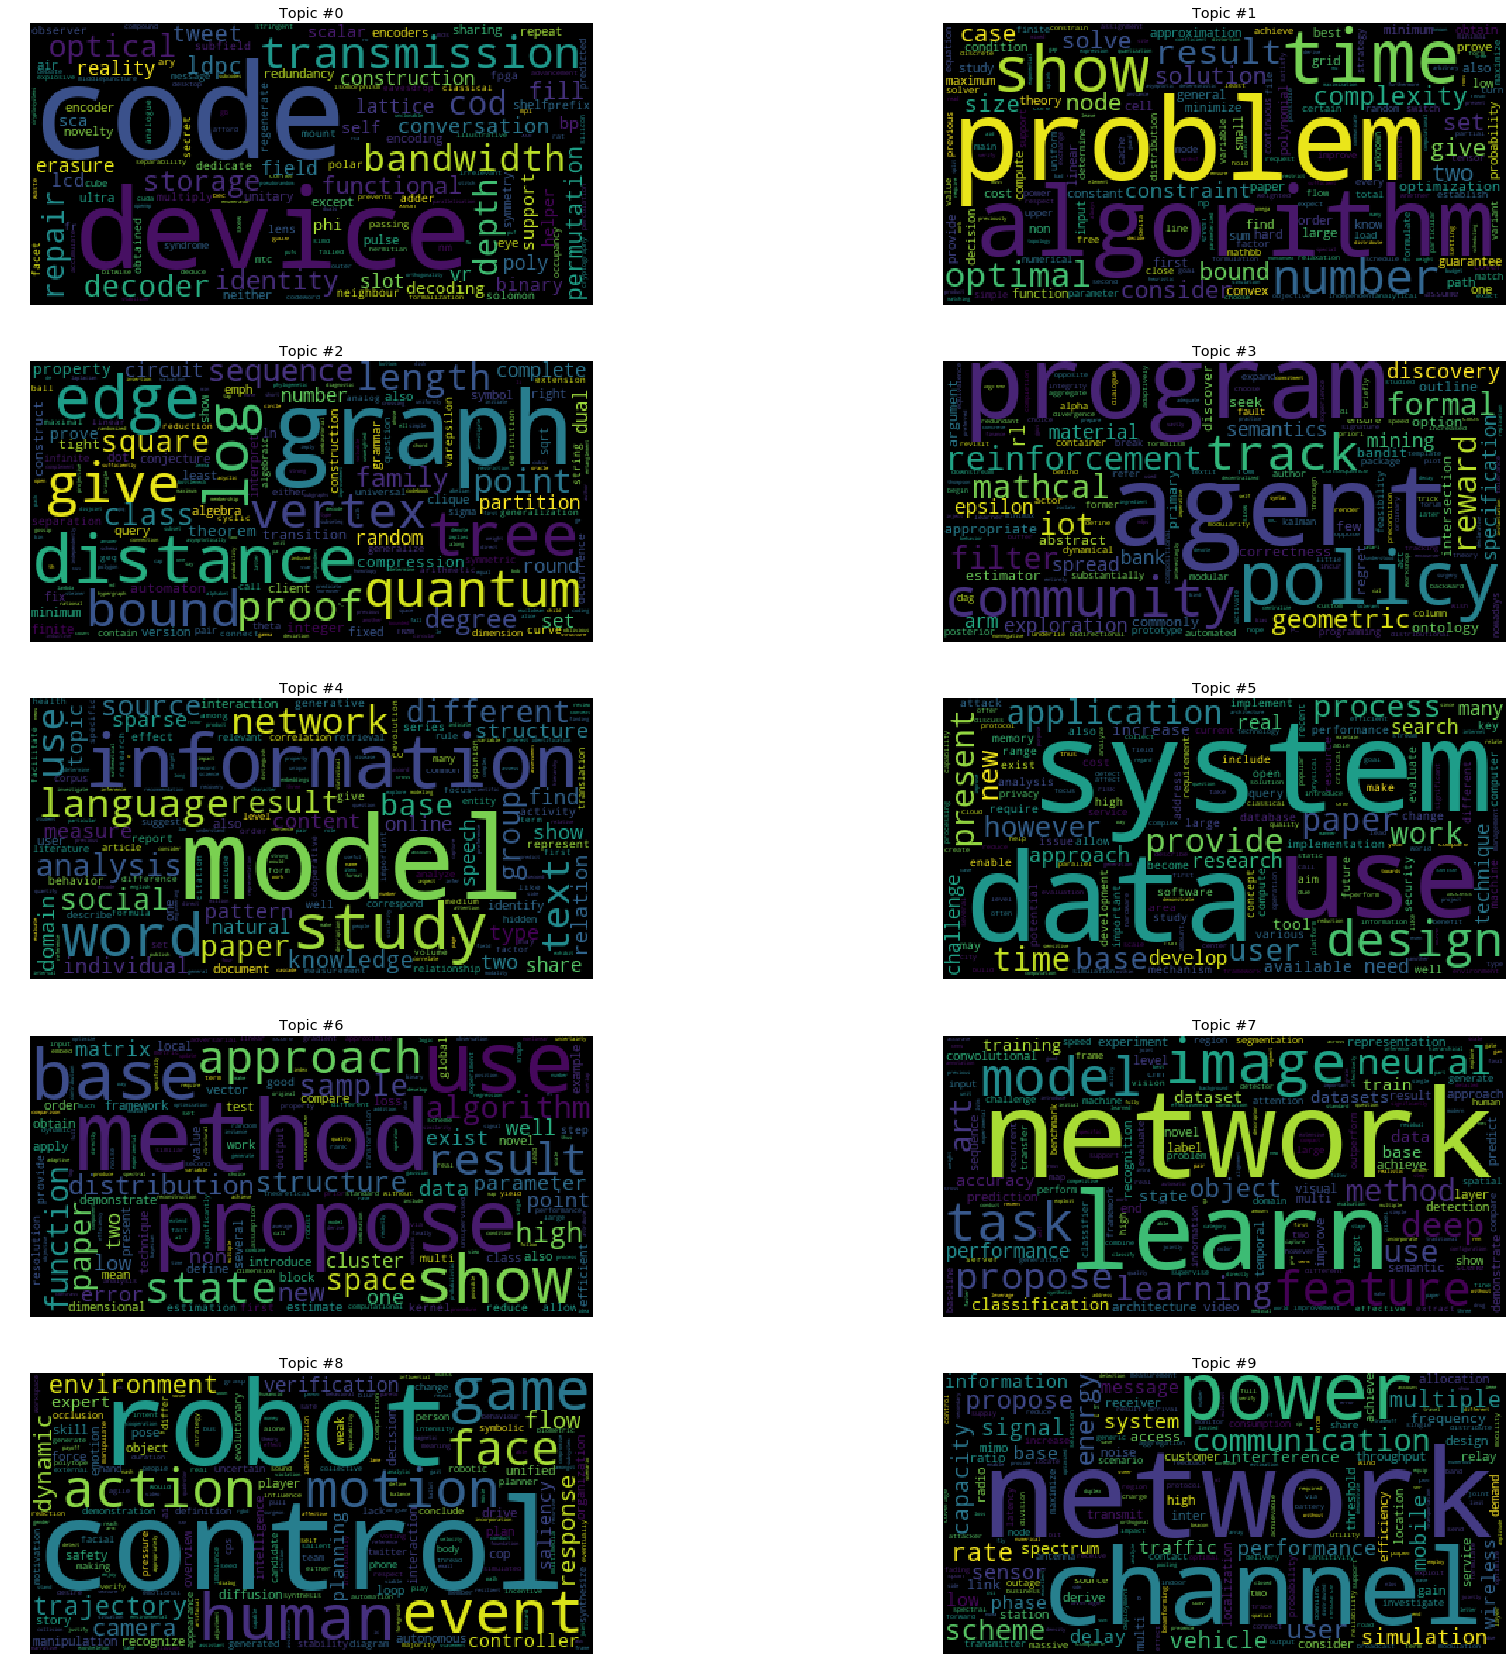

In [98]:
topic_model.vizualize_result()

## 類似文献の提示
学習済みのトピックモデルをつかって、ある文献と類似している文献を検索する。  

トピックモデルでは、ある文献がもつ「そのトピックらしさ」を各トピックについて計算することができる（下図）  
これをトピック分布(Topic distribution)と呼ぶことにする。

Text(0.5, 0, 'Topic Number')

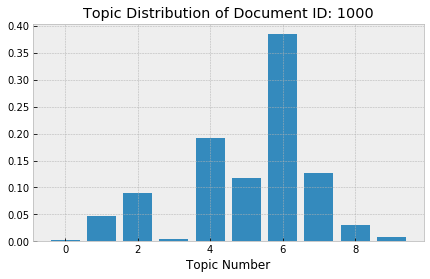

In [99]:
idx = 1000
doc  = df.iloc[idx]["abstract"]
corpus = topic_model.corpus_from_doc(doc)
topic_distoribution = topic_model.model.lda.get_document_topics(corpus)

fig = plt.figure(figsize=(7, 4 ))
plt.style.use('bmh')

ax1 = fig.add_subplot(1, 1, 1)
ax1.bar([e[0] for e in topic_distoribution], [e[1] for e in topic_distoribution])
ax1.set_title("Topic Distribution of Document ID: " + str(idx))
ax1.set_xlabel("Topic Number")

類似文献の検索では、この分布を特徴ベクトルとし、似た特徴ベクトルをもつ文献を指定した数だけ取り出す。

実際に類似文献の検索を行う。

In [100]:
similar_doc_ind = None

idx = 1000
doc  = df.iloc[idx]["abstract"]
topic_model.add_doc(doc, idx=idx)

%time recommended_ids = topic_model.recommend_from_id(idx, num_similar_docs=10)
similar_doc_idx = recommended_ids[1]
for ridx in recommended_ids:
    if ridx == idx:
        continue
    print("[recommend ]" + str(ridx))

ERROR:root:[Error] There is the same ID in corpus.


CPU times: user 179 ms, sys: 5.82 ms, total: 185 ms
Wall time: 186 ms
[recommend ]4297
[recommend ]4047
[recommend ]3945
[recommend ]4466
[recommend ]2013
[recommend ]4346
[recommend ]2078
[recommend ]3765
[recommend ]2520


Text(0.5, 1.0, 'Document ID: 4297')

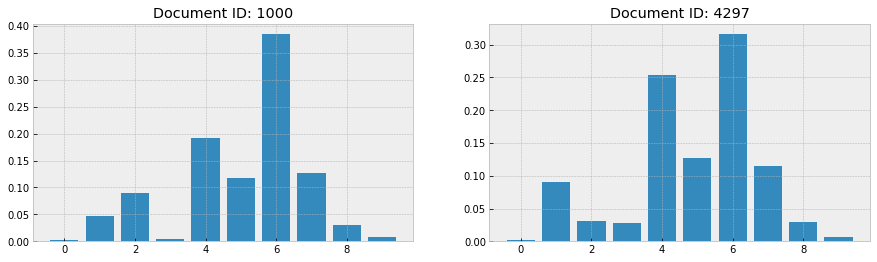

In [101]:
doc  = df.iloc[idx]["abstract"]
corpus = topic_model.corpus_from_doc(doc)
topic_distoribution = topic_model.model.lda.get_document_topics(corpus)

fig = plt.figure(figsize=(15, 4 ))
plt.style.use('bmh')

ax1 = fig.add_subplot(1, 2, 1)
ax1.bar([e[0] for e in topic_distoribution], [e[1] for e in topic_distoribution])
ax1.set_title("Document ID: " + str(idx))

ax2 = fig.add_subplot(1, 2, 2)
doc  = df.iloc[similar_doc_idx]["abstract"]
corpus = topic_model.corpus_from_doc(doc)
topic_distoribution = topic_model.model.lda.get_document_topics(corpus)
ax2.bar([e[0] for e in topic_distoribution], [e[1] for e in topic_distoribution])
ax2.set_title("Document ID: " +  str(similar_doc_idx))

左に類似文献のクエリがもつトピック分布、右にもっとも類似度が高いと判断された文献のもつトピック分布を示す。  

以下に、類似文献の上位5つの内容を示す。

In [103]:
# Target
target_doc  = df.iloc[idx]["abstract"]
topic_model.add_doc(doc, idx=idx)

print("* Target document: ")
print(target_doc)
print("----")

# Similar 
print("* Similar document: ")
count = 0
for similar_doc_idx in recommended_ids:
    if count == 0:
        count += 1
        continue
        
    if count > 5:
        break
        
    similar_doc  = df.iloc[similar_doc_idx]["abstract"]
    print(similar_doc)
    print("----")
    
    count += 1

ERROR:root:[Error] There is the same ID in corpus.


* Target document: 
musical source separation methods exploit source-specific spectral characteristics to facilitate the decomposition process. kernel additive modelling (kam) models a source applying robust statistics to time-frequency bins as specified by a source-specific kernel, a function defining similarity between bins. kernels in existing approaches are typically defined using metrics between single time frames. in the presence of noise and other sound sources information from a single-frame, however, turns out to be unreliable and often incorrect frames are selected as similar. in this paper, we incorporate a temporal context into the kernel to provide additional information stabilizing the similarity search. evaluated in the context of vocal separation, our simple extension led to a considerable improvement in separation quality compared to previous kernels.
----
* Similar document: 
in this paper the problem of forecasting high dimensional time series is considered. such tim